Link at: https://colab.research.google.com/drive/1Xii1XxwDUr6i4s16rCUzKRb-w-buqeIt?usp=sharing

In [2]:
import numpy as dcpy

In [3]:
import matplotlib.pyplot as dcplot

In [ ]:
# %%capture
# !pip install git+https://github.com/williamedwardhahn/mpcr
# from mpcr import *

In [10]:
# Defining and printing out the diagram on how a differential equation works
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

<img src="https://cdn1.byjus.com/wp-content/uploads/2018/11/maths/2016/06/03060820/Differential-Equation.jpg">

# Exponential Growth & Exponential Decay: Consumption and Supply of Silicon From 1960

In [4]:
# Defining the Differential Equation
def Exp_Growth_Equation(Current_Exponential_Growth):
    return .1*Current_Exponential_Growth

In [5]:
Current_Exponential_Growth = 1
Starting_Year= 1960 #Starting Time
Present = 2022 #Final Stopping Time
Time_Step_Size = .1 # Time Step Size
Growth = int((Present-Starting_Year)/Time_Step_Size)
Growth

620

In [81]:
# Building an array for the exponential growth function
Consumption = dcpy.zeros(Growth,)
Time = dcpy.zeros(Growth,)

In [82]:
# Solving the differential equation and using the loop with the X array to prepare for plotting
for integer in range(Growth):

    
    Current_Exponential_Growth = Current_Exponential_Growth + Exp_Growth_Equation(Current_Exponential_Growth)*Time_Step_Size

    time_function =Starting_Year+integer*Time_Step_Size

    Consumption[integer] = Current_Exponential_Growth 
    Time[integer] = time_function 

In [83]:
# Confirming Values
Consumption.shape,Time.shape


((620,), (620,))

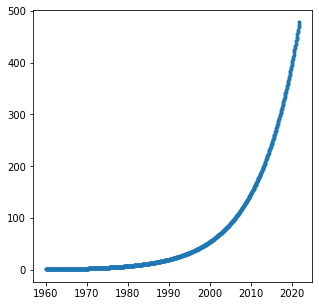

In [ ]:
# Plotting the Exponential Growth Function
dcplot.figure(figsize=(5,5))
dcplot.plot(Time,Consumption,'.');

In [ ]:
# Defining the exponential decay function
def Exp_Decay_Equation(Current_Exponential_Decay):
    return -0.035*Current_Exponential_Decay

In [ ]:
# Defining the variable for the exponential decay function
Current_Exponential_Decay = 100000
Starting_Supply_Year = 1960
Predicted_Out_Of_Supply_Year = 2122
Time_Step_Size = .1

Decay = int((Predicted_Out_Of_Supply_Year -Starting_Supply_Year)/Time_Step_Size)
Supply = dcpy.zeros(Decay,)
Time = dcpy.zeros(Decay,)

In [ ]:
# Solving the differential equation and using the loop with the X array to prepare for plotting
for integer in range(Decay):

    Current_Exponential_Decay = Current_Exponential_Decay + Exp_Decay_Equation(Current_Exponential_Decay) * Time_Step_Size
    time_function = Starting_Year + integer * Time_Step_Size

    Supply[integer] = Current_Exponential_Decay
    Time[integer] = time_function

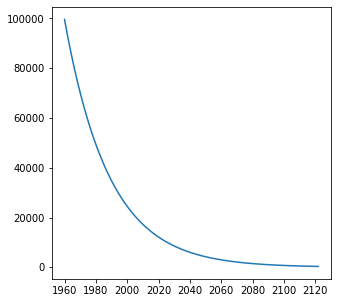

In [ ]:
# Plotting the Exponential Decay Function
dcplot.figure(figsize=(5,5))
dcplot.plot(Time,Supply);

# Matrix Version Reverse Damped Harmonic Oscillator or Tacoma Narrows Bridge Simulator

In [ ]:
graph = dcpy.array([[0,1],[-2,-0.1]])

In [ ]:
matprint(graph)

 0     1  
-2  -0.1  


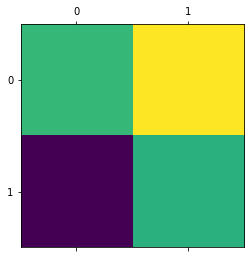

In [ ]:
dcplot.matshow(graph)

In [ ]:
def Osc_Function(waves,start_time):
    return graph @ waves

In [ ]:
rows = 2
waves = dcpy.array([0,1])

start_time  = 0
bridge_broken_time = 50
derived_time = 0.001

oscillation = int((bridge_broken_time-start_time)/derived_time)
Osc_Array = dcpy.zeros((oscillation,rows))

In [ ]:
for i in range(oscillation):

    waves = waves - Osc_Function(waves,start_time)*derived_time

    Osc_Array[i] = waves

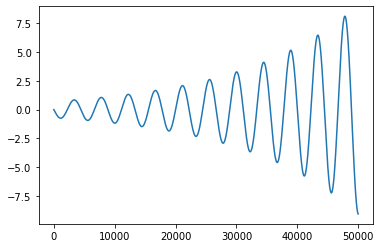

In [ ]:
dcplot.plot(Osc_Array[:, 0]);

# Matrix Version Polar Bear Vs Seal Predator-Prey System

In [ ]:
def dx_dt(Seal_VS_Polar_Bear,Starting_year):
    return dcpy.array([
                      alpha*Seal_VS_Polar_Bear[0]  - beta*Seal_VS_Polar_Bear[0]*Seal_VS_Polar_Bear[1],
                                   delta*Seal_VS_Polar_Bear[0]*Seal_VS_Polar_Bear[1] - gamma*Seal_VS_Polar_Bear[1]  
    ])

In [ ]:
Predator_Prey_Array = 2
Seal_VS_Polar_Bear = dcpy.zeros(Predator_Prey_Array,)

Seal_VS_Polar_Bear[0] = 10
Seal = Seal_VS_Polar_Bear[0]  
Seal_VS_Polar_Bear[1] = 10
Polar_Bear = Seal_VS_Polar_Bear[1]
Starting_year = 1900
Final_year = 2000
Derived_Time = 0.001

Seal_VS_Polar_Bear_Population = int((Final_year-Starting_year)/Derived_Time)
Population = dcpy.zeros((Seal_VS_Polar_Bear_Population, Predator_Prey_Array),)
Timeline = dcpy.zeros((Seal_VS_Polar_Bear_Population,Predator_Prey_Array),)

In [ ]:
alpha = 1 
beta = 0.05 
delta = 0.02
gamma = 0.5

In [ ]:
for integer in range(Seal_VS_Polar_Bear_Population):

    Seal_VS_Polar_Bear = Seal_VS_Polar_Bear + dx_dt(Seal_VS_Polar_Bear,Starting_year) * Derived_Time
    Seal_VS_Polar_Bear_Timeline = Starting_year + integer * Derived_Time
    Population[integer] = Seal_VS_Polar_Bear
    Timeline[integer] = Seal_VS_Polar_Bear_Timeline

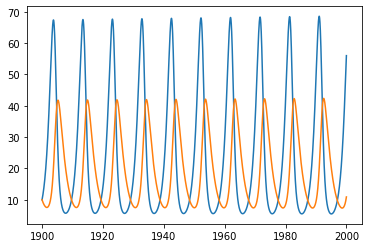

In [ ]:
dcplot.plot(Timeline,Population)

# Matrix Lorenz System

$\frac{dx}{dt}=\sigma(y-x)$

$\frac{dy}{dt}=x(p-z)-y$

$\frac{dz}{dt}=xy-\beta z$

In [70]:
# Non x or y Variables

# In dy/dt
rho = 36.0
# In dx/dt
sigma = 20.0
# In dz/dt
beta = 16.0 / 3.0

In [71]:
matrix_model = dcpy.array([[-sigma,sigma,0,0,0],[rho,-1,0,0,-1],[0,0,-beta,1,0]])

In [72]:
matprint(matrix_model)

-20  20         0  0   0  
 36  -1         0  0  -1  
  0   0  -5.33333  1   0  


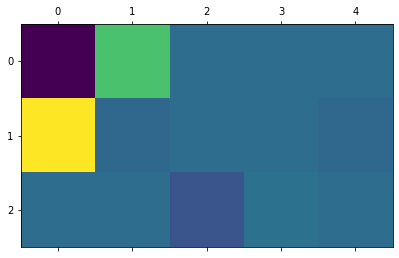

In [73]:
dcplot.matshow(matrix_model)

In [75]:
# Defining the Lorenz Matrix
# X of the Gradient equals Lorenz_Gradient
def Lorenz_Gradient_Function(Lorenz_Gradient, Gradient_Start_Time):
    Lorenz_Gradient, y, z = Lorenz_Gradient
    
    state = dcpy.array([Lorenz_Gradient,y,z,Lorenz_Gradient*y,Lorenz_Gradient*z])
    return matrix_model @ state 

In [76]:
# Array for the Dimensions needed and building it for the gradient
Dimensions = 3
Lorenz_Gradient = dcpy.array([1,1,1])

Gradient_Start_Time  = 0
Gradient_End_Time = 50
Gradient_Step_Size = 0.001

Gradient = int((Gradient_End_Time-Gradient_Start_Time)/Gradient_Step_Size)
X = dcpy.zeros((Gradient,Dimensions))

In [77]:
for integer in range(Gradient):

    Lorenz_Gradient = Lorenz_Gradient + Lorenz_Gradient_Function(Lorenz_Gradient, Gradient_Start_Time)*Gradient_Step_Size

    X[integer] = Lorenz_Gradient

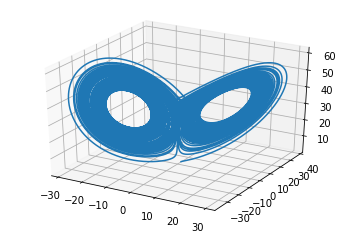

In [78]:
Lorenz_Model = dcplot.figure()
Lorenz_Matrix_Graph = Lorenz_Model.gca(projection="3d")
Lorenz_Matrix_Graph.plot(X[:, 0], X[:, 1], X[:, 2]);